In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import math
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from numpy.lib.shape_base import split

**Affline transformations**

Apply the following chain of transformations on the generated coordinates:

A) Rotation by 30 degrees.

B) Translation of x coordinate by -1 units and y coordinate by 1 units.

C) Scaling by 2 units.

D) Rotation by 30 degrees.


In [ ]:
np.random.seed(10)

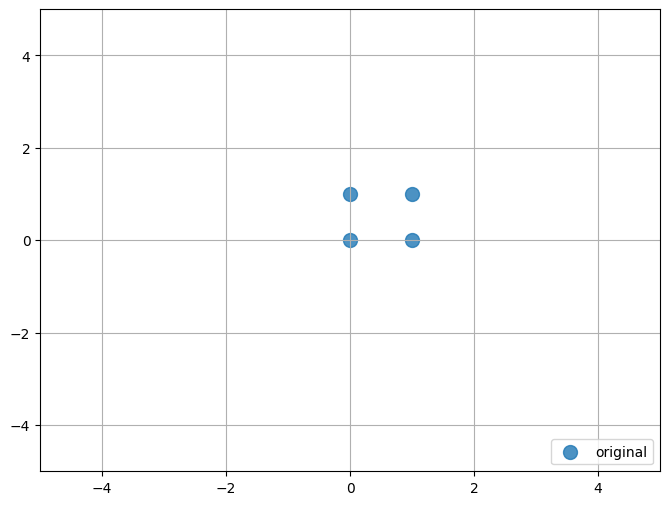

In [ ]:
def get_grid(x,y,h=False):
  coords=np.indices((x,y)).reshape(2,-1)
  return np.vstack((coords,np.ones(coords.shape[1]))).astype(int) if h else coords

def grid_plotter(points,labels):
  markers = ['o', 'x', 's', '^', 'p', 'v']
  fig,ax=plt.subplots(figsize=(8,6))
  for i,p in enumerate(points):
    x,y=p[0],p[1]
    ax.scatter(x,y,label=labels[i],marker=markers[i],alpha=0.8,s=100)
  ax.legend(loc='lower right')
  ax.set_xlim(-5,5)
  ax.set_ylim(-5,5)
  ax.grid(True)
  plt.show()

def show_image(img):
  fig,ax=plt.subplots(figsize=(8,6))
  ax.imshow(img)
  plt.show()

#generated coordinates
coords = get_grid(2, 2, h=True)
grid_plotter(np.array([coords]),
             labels=['original'])


In [ ]:
# Defining a function to rotate the given set of points
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def get_scale(s):

    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])

In [ ]:
# Apply the following transformation
R1 = get_rotation(30)
T1 = get_translation(-1, 1)
S1 = get_scale(2)


# Rotation -> Translation -> Scaling -> Rotation"
coords1 = R1 @ T1 @ S1@ R1@coords


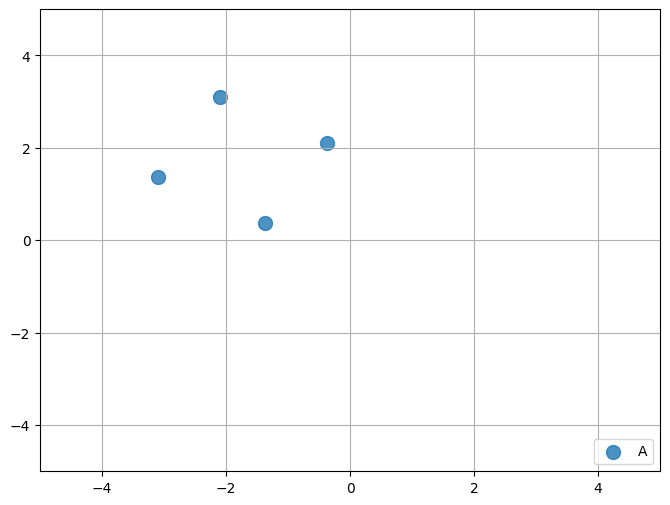

In [ ]:
grid_plotter(np.array([coords1]),
             labels=['A'])

In [ ]:
#apply the following chain of transformations R1 -> S1 -> T1 to coords and name it coords_1
coords_1=R1@S1@T1@coords

coords_2=T1@R1@S1@T1@coords
split_1=np.split(coords_1,coords_1.shape[1],axis=1)
split_2=np.split(coords_2,coords_2.shape[1],axis=1)
dist=[]
for i in range(len(split_1)):
  dist.append(np.linalg.norm(split_1[i]-split_2[i]))
mean_value=np.mean(np.array(dist))
np.floor(mean_value)



1.0

**Bag of Words**

Step 1. Given a folder of images, use SIFT to extract their feature descriptors.

Step 2. Perform k-means clustering on the extracted descriptors.

Step 3. Create histograms by taking help of the clusters calculated in the previous step.

Step 4. Estimate 5 nearest neighbours to a given image and add the distances of those 5 neighbours.

In [ ]:
extractor = cv2.xfeatures2d.SIFT_create()

def features(image,extractor):
  keypoints, descriptors = extractor.detectAndCompute(image, None)
  return keypoints,descriptors

def build_histogram(descriptor,cluster_alg):
  histogram=np.zeros(len(cluster_alg.cluster_centers_))
  cluster_result=cluster_alg.predict(descriptor)
  for i in cluster_result:
    histogram[i]+=1
  return histogram

def extract_descriptors(images,extractors):
  d_list=[]
  for image in images:
    k,d=features(image,extractors)
    d_list.append(d)
    # vertically stack all the elements of the list
    # using np.vstack()
  ds=d_list[0]
  for d in d_list[1:]:
    ds=np.vstack((ds,d))
  d_float=d.astype(float)
  return d_float



In [ ]:
images=[]
n=cv2.imread("White_Pelican_0005_95916.jpg")
#print(n)
images.append(n)
descriptors_float = extract_descriptors(images, extractor)
kmeans=KMeans(n_clusters=100,random_state=0)
kmeans.fit(descriptors_float)
h_images=[]

for image in images:
    keypoint, descriptor = features(image, extractor)
    descriptor = descriptor.astype(float)

    if (descriptor is not None):
        histogram = build_histogram(descriptor, kmeans)

        h_images.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
neighbour=NearestNeighbors(n_neighbors=5)
neighbour.fit(h_images)
data=cv2.imread("White_Pelican_0005_95916.jpg")
keypoint, descriptor = features(data, extractor)
descriptor = descriptor.astype(float)
histogram = build_histogram(descriptor, kmeans)
keypoint, descriptor = features(data, extractor)
descriptor = descriptor.astype(float)
histogram = build_histogram(descriptor, kmeans)
np.sum(dist)

5.6568542494923815